In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from parameters import plotting_parameters

In [2]:
ML_integration_multiO = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')
ML_integration_multiO.head(1)

Unnamed: 0                                 Full name of paper  \
0           0  A gene prioritization method based on a swine ...   

                                          Doi  Year  Month  \
0  https://doi.org/10.1038/s42003-020-01233-4  2020      9   

              Author email TGCA?  Number citations  \
0  shzhao@mail.hzau.edu.cn   NaN                15   

                                 Other (state which)  Autoencoder  ...  \
0  integrates affinity matrix and network fusion ...          NaN  ...   

   Dataset  Dataset2  Dataset3  TCGA  OWN  OTHER  single-paper sets  \
0      OWN       NaN       NaN   NaN  1.0    NaN                NaN   

   Updated_DB_TCGA Updated_DB_Other  Updated_DB_exclude  
0              NaN              1.0                 NaN  

[1 rows x 206 columns]

In [3]:

ML_integration = pd.read_csv('../../data/ML_AND_Integration.csv', index_col=None, sep=';')
ML_integration = ML_integration.drop('Unnamed: 0', axis=1)
ML_integration.head(1)

Doi  Year  Month  Author email  TGCA?  \
0  10.1016/j.agsy.2019.03.015  2019    7.0           NaN    NaN   

   Number citations Other (state which)  Autoencoder  \
0              95.0                 NaN          NaN   

  Convolutional neural network (no bottleneck)  \
0                                          NaN   

   All-to-all network (no bottleneck)  ...  INFO GAIN RATIO  INFO GAIN  \
0                                 NaN  ...              NaN        NaN   

   Bagged trees  Physics-based ML  miRcorrNet  \
0           NaN               NaN         NaN   

   adaptive-network-based fuzzy inference system (ANFIS)   Pymatgen  Factsage  \
0                                                NaN            NaN       NaN   

   Aflow  Density functional theory  
0    NaN                        NaN  

[1 rows x 133 columns]

In [4]:
#Rename columns with long names
ML_integration_multiO= ML_integration_multiO.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 

ML_integration = ML_integration.rename(columns={'Other Gradient Boosting Machines (excl the main algos XGBoost, lightGBM, Adaboost)': 'Other Gradient Boosting Machines'}) 
ML_integration = ML_integration.rename(columns={'adaptive-network-based fuzzy inference system (ANFIS) ':'ANFIS'}) 

ML_integration_multiO = ML_integration_multiO.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 
ML_integration = ML_integration.rename(columns={'minimum redundancy and maximum relevance feature selection': 'Min redundancy max relevancy'}) 

ML_integration_multiO = ML_integration_multiO.rename(columns={'gene regulatory network model': 'GRN model'}) 
ML_integration = ML_integration.rename(columns={'gene regulatory network model': 'GRN model'}) 


In [5]:
ML_integration.shape

(100, 133)

In [6]:
ML_integration_multiO.shape

(100, 206)

In [7]:
technique_columns = ML_integration.columns[7:]

for col in ML_integration_multiO.columns:

    if col not in technique_columns:
        ML_integration_multiO = ML_integration_multiO.drop(col, axis=1)

In [8]:
# Get the list of techniques that appear more than once from ml and multi-o
ML_integration_multiO_sum_plot_list = ML_integration_multiO.sum()
ML_integration_multiO_sum_plot_list = ML_integration_multiO_sum_plot_list[ML_integration_multiO_sum_plot_list>1]
ML_integration_multiO_sum_plot_list = ML_integration_multiO_sum_plot_list.index
ML_integration_multiO_sum_plot_list

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_27540/4150490754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_multiO_sum_plot_list = ML_integration_multiO.sum()


Index(['Autoencoder', 'All-to-all network (no bottleneck)',
       'Recurrent Neural Network (incl LSTM)', 'K-means clustering', 'SVM',
       'capsule network', 'Other Gradient Boosting Machines', 'Cox-PH',
       'Transformer', 'Generative Adverserial Networks', 'Logistic regression',
       'Biweight midcorrelation', 'Sparse regression', 'Random forest',
       'K-Nearest neighbours', 'PCA', 'Similarity network fusion', 'iCluster',
       'iCluster Bayes', 'XGBoost', 'Naive Bayes', 'Radial Basis Function',
       'Elastic net', 't-SNE', 'Non-negative matrix factorization', 'Adaboost',
       'Lasso Regression', 'Linear regression', 'Ridge regression',
       'Manifold alignment', 'Block forest', 'Kaplan-Meier', 'GRN model',
       'Lasso feature importance', 'iClusterPlus ', 'Gaussian mixture models',
       'Spectral clustering', 'LRAcluster', 'NEMO', 'MCCA', 'CIMLR', 'PINS'],
      dtype='object')

In [9]:
ML_integration_sum_plot = ML_integration[1:]
ML_integration_sum_plot.columns

Index(['Doi', 'Year', 'Month', 'Author email', 'TGCA?', 'Number citations',
       'Other (state which)', 'Autoencoder',
       'Convolutional neural network (no bottleneck)',
       'All-to-all network (no bottleneck)',
       ...
       'INFO GAIN RATIO', 'INFO GAIN', 'Bagged trees', 'Physics-based ML',
       'miRcorrNet', 'ANFIS', 'Pymatgen', 'Factsage', 'Aflow',
       'Density functional theory'],
      dtype='object', length=133)

In [10]:
ML_integration_sum_plot = ML_integration[1:]
ML_integration_sum_plot = ML_integration_sum_plot.sum()
ML_integration_sum_plot = ML_integration_sum_plot.drop([ 
                                                        'Doi', 
                                                        'Year', 
                                                        'Month', 
                                                        'Author email', 
                                                        'TGCA?',
                                                        'Number citations'])
ML_integration_sum_plot = ML_integration_sum_plot[ML_integration_sum_plot>1]
ML_integration_sum_plot_list = ML_integration_sum_plot.index
ML_integration_sum_plot_list

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_27540/1032253545.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ML_integration_sum_plot = ML_integration_sum_plot.sum()


Index(['All-to-all network (no bottleneck)',
       'Recurrent Neural Network (incl LSTM)', 'K-means clustering', 'SVM',
       'Other Gradient Boosting Machines', 'Cox-PH', 'Logistic regression',
       'Random forest', 'K-Nearest neighbours', 'PCA', 'XGBoost',
       'Naive Bayes', 'Radial Basis Function', 'Elastic net', 't-SNE',
       'Adaboost', 'Lasso Regression', 'Linear regression',
       'Self organising maps', 'Random survival forest',
       'Maximum likelihood classification',
       'Classification And Regression Tree', 'Genetic algorithm',
       'Extra trees', 'Gaussian process'],
      dtype='object')

In [11]:
print(len(ML_integration_sum_plot_list))
print(len(ML_integration_multiO_sum_plot_list))

25
42


In [12]:

item_in_either_list = []

for item in ML_integration_sum_plot_list:

    if item not in item_in_either_list:
        item_in_either_list.append(item)


for item in ML_integration_multiO_sum_plot_list:

    if item not in item_in_either_list:
        item_in_either_list.append(item)

In [13]:
print(len(item_in_either_list))

49


In [14]:
#  Drop from integration
for col in ML_integration.columns:
    if col not in item_in_either_list:
        ML_integration = ML_integration.drop(col,axis=1)
        if col == 'Random forest':
            print(1)

In [15]:
#  Drop from multio integration
for col in ML_integration_multiO.columns:
    if col not in item_in_either_list:
        ML_integration_multiO = ML_integration_multiO.drop(col,axis=1)

In [16]:
ML_integration_multiO.shape

(100, 49)

## Prepare data for ml + multiO

In [17]:
ML_integration_multiO_sum_plot = ML_integration_multiO.sum()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.sort_values(ascending=False)

In [18]:
ML_integration_sum_plot.shape

(25,)

Text(0.5, 1.0, 'Number of appearances in 100 papers for ML and integration and multiOmics')

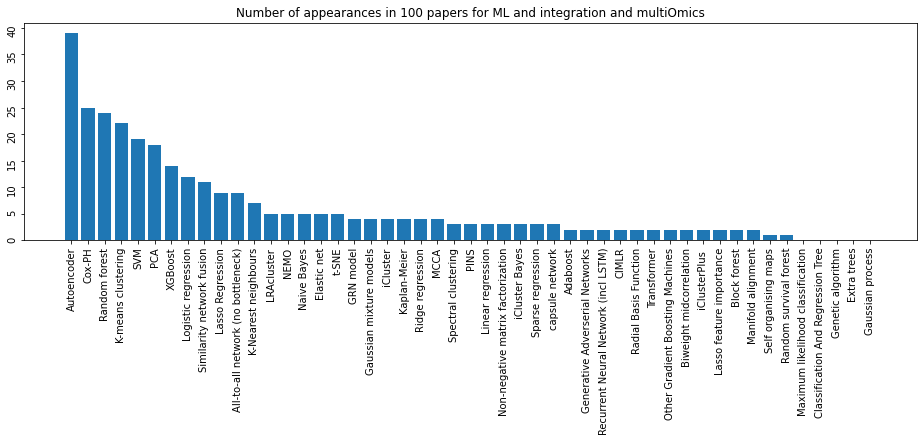

In [19]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_multiO_sum_plot, x= ML_integration_multiO_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and integration and multiOmics")
#axs[1].bar(height=ML_integration_multiO_sum_plot, x= ML_integration_multiO_sum_plot.index)

## Prepare data for ML and integration

In [20]:
ML_integration_sum_plot = ML_integration
ML_integration_sum_plot = ML_integration_sum_plot.sum()

In [21]:
ML_integration_sum_plot

Autoencoder                              1.0
All-to-all network (no bottleneck)      11.0
Recurrent Neural Network (incl LSTM)     7.0
capsule network                          0.0
Transformer                              0.0
Generative Adverserial Networks          0.0
K-means clustering                       5.0
SVM                                     37.0
Other Gradient Boosting Machines         6.0
Cox-PH                                   2.0
Logistic regression                      9.0
Biweight midcorrelation                  0.0
Sparse regression                        0.0
Random forest                           40.0
K-Nearest neighbours                     9.0
PCA                                     14.0
Similarity network fusion                0.0
iCluster                                 0.0
iCluster Bayes                           0.0
XGBoost                                  9.0
Naive Bayes                              7.0
Radial Basis Function                    2.0
Elastic ne

Text(0.5, 1.0, 'Number of appearances in 100 papers for ML and data integration')

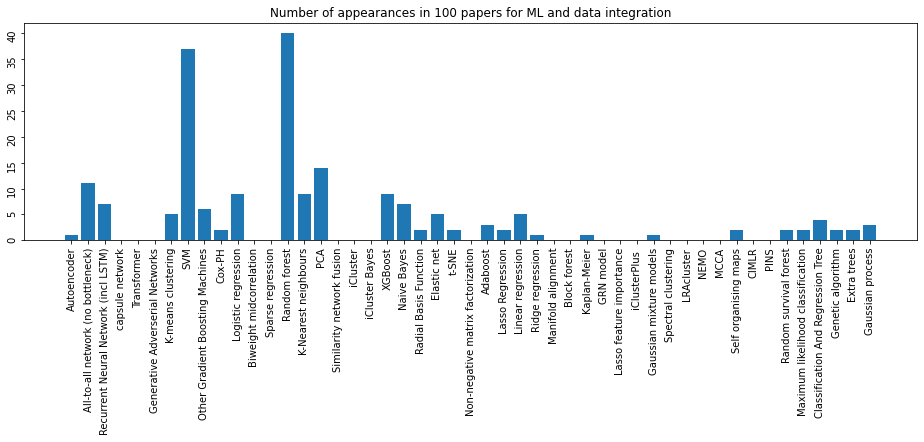

In [22]:
#Plot data
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(height=ML_integration_sum_plot, x= ML_integration_sum_plot.index)
axs.tick_params(labelrotation=90)
axs.set_title("Number of appearances in 100 papers for ML and data integration")

In [23]:
ML_integration_sum_plot_df = pd.DataFrame(ML_integration_sum_plot)
ML_integration_sum_plot_df["Technique"] = ML_integration_sum_plot_df.index
ML_integration_sum_plot_df["Count"] = ML_integration_sum_plot_df[0]
ML_integration_sum_plot_df = ML_integration_sum_plot_df.reset_index()
ML_integration_sum_plot_df = ML_integration_sum_plot_df.drop([0, "index"], axis=1)
ML_integration_sum_plot_df

Technique  Count
0                            Autoencoder    1.0
1     All-to-all network (no bottleneck)   11.0
2   Recurrent Neural Network (incl LSTM)    7.0
3                        capsule network    0.0
4                            Transformer    0.0
5        Generative Adverserial Networks    0.0
6                     K-means clustering    5.0
7                                    SVM   37.0
8       Other Gradient Boosting Machines    6.0
9                                 Cox-PH    2.0
10                   Logistic regression    9.0
11               Biweight midcorrelation    0.0
12                     Sparse regression    0.0
13                         Random forest   40.0
14                  K-Nearest neighbours    9.0
15                                   PCA   14.0
16             Similarity network fusion    0.0
17                              iCluster    0.0
18                        iCluster Bayes    0.0
19                               XGBoost    9.0
20                           Naive Bayes    7.0
21                 Radial Basis Function    2.0
22                           Elastic net    5.0
23                                 t-SNE    2.0
24     Non-negative matrix factorization    0.0
25                              Adaboost    3.0
26                      Lasso Regression    2.0
27                     Linear regression    5.0
28                      Ridge regression    1.0
29                    Manifold alignment    0.0
30                          Block forest    0.0
31                          Kaplan-Meier    1.0
32                             GRN model    0.0
33              Lasso feature importance    0.0
34                         iClusterPlus     0.0
35               Gaussian mixture models    1.0
36                   Spectral clustering    0.0
37                            LRAcluster    0.0
38                                  NEMO    0.0
39                                  MCCA    0.0
40                  Self organising maps    2.0
41                                 CIMLR    0.0
42                                  PINS    0.0
43                Random survival forest    2.0
44     Maximum likelihood classification    2.0
45    Classification And Regression Tree    4.0
46                     Genetic algorithm    2.0
47                           Extra trees    2.0
48                      Gaussian process    3.0

In [24]:
ML_integration_multiO_sum_plot

Autoencoder                             39.0
Cox-PH                                  25.0
Random forest                           24.0
K-means clustering                      22.0
SVM                                     19.0
PCA                                     18.0
XGBoost                                 14.0
Logistic regression                     12.0
Similarity network fusion               11.0
Lasso Regression                         9.0
All-to-all network (no bottleneck)       9.0
K-Nearest neighbours                     7.0
LRAcluster                               5.0
NEMO                                     5.0
Naive Bayes                              5.0
Elastic net                              5.0
t-SNE                                    5.0
GRN model                                4.0
Gaussian mixture models                  4.0
iCluster                                 4.0
Kaplan-Meier                             4.0
Ridge regression                         4.0
MCCA      

In [25]:
ML_integration_multiO_sum_plot = pd.DataFrame(ML_integration_multiO_sum_plot)
ML_integration_multiO_sum_plot["Technique"] = ML_integration_multiO_sum_plot.index
ML_integration_multiO_sum_plot["Count"] = ML_integration_multiO_sum_plot[0]
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.reset_index()
ML_integration_multiO_sum_plot = ML_integration_multiO_sum_plot.drop([0, "index"], axis=1)
ML_integration_multiO_sum_plot

Technique  Count
0                            Autoencoder   39.0
1                                 Cox-PH   25.0
2                          Random forest   24.0
3                     K-means clustering   22.0
4                                    SVM   19.0
5                                    PCA   18.0
6                                XGBoost   14.0
7                    Logistic regression   12.0
8              Similarity network fusion   11.0
9                       Lasso Regression    9.0
10    All-to-all network (no bottleneck)    9.0
11                  K-Nearest neighbours    7.0
12                            LRAcluster    5.0
13                                  NEMO    5.0
14                           Naive Bayes    5.0
15                           Elastic net    5.0
16                                 t-SNE    5.0
17                             GRN model    4.0
18               Gaussian mixture models    4.0
19                              iCluster    4.0
20                          Kaplan-Meier    4.0
21                      Ridge regression    4.0
22                                  MCCA    4.0
23                   Spectral clustering    3.0
24                                  PINS    3.0
25                     Linear regression    3.0
26     Non-negative matrix factorization    3.0
27                        iCluster Bayes    3.0
28                     Sparse regression    3.0
29                       capsule network    3.0
30                              Adaboost    2.0
31       Generative Adverserial Networks    2.0
32  Recurrent Neural Network (incl LSTM)    2.0
33                                 CIMLR    2.0
34                 Radial Basis Function    2.0
35                           Transformer    2.0
36      Other Gradient Boosting Machines    2.0
37               Biweight midcorrelation    2.0
38                         iClusterPlus     2.0
39              Lasso feature importance    2.0
40                          Block forest    2.0
41                    Manifold alignment    2.0
42                  Self organising maps    1.0
43                Random survival forest    1.0
44     Maximum likelihood classification    0.0
45    Classification And Regression Tree    0.0
46                     Genetic algorithm    0.0
47                           Extra trees    0.0
48                      Gaussian process    0.0

In [26]:
merged_data_set = pd.merge(left = ML_integration_multiO_sum_plot, right = ML_integration_sum_plot_df, on="Technique", how="outer")
merged_data_set

Technique  Count_x  Count_y
0                            Autoencoder     39.0      1.0
1                                 Cox-PH     25.0      2.0
2                          Random forest     24.0     40.0
3                     K-means clustering     22.0      5.0
4                                    SVM     19.0     37.0
5                                    PCA     18.0     14.0
6                                XGBoost     14.0      9.0
7                    Logistic regression     12.0      9.0
8              Similarity network fusion     11.0      0.0
9                       Lasso Regression      9.0      2.0
10    All-to-all network (no bottleneck)      9.0     11.0
11                  K-Nearest neighbours      7.0      9.0
12                            LRAcluster      5.0      0.0
13                                  NEMO      5.0      0.0
14                           Naive Bayes      5.0      7.0
15                           Elastic net      5.0      5.0
16                                 t-SNE      5.0      2.0
17                             GRN model      4.0      0.0
18               Gaussian mixture models      4.0      1.0
19                              iCluster      4.0      0.0
20                          Kaplan-Meier      4.0      1.0
21                      Ridge regression      4.0      1.0
22                                  MCCA      4.0      0.0
23                   Spectral clustering      3.0      0.0
24                                  PINS      3.0      0.0
25                     Linear regression      3.0      5.0
26     Non-negative matrix factorization      3.0      0.0
27                        iCluster Bayes      3.0      0.0
28                     Sparse regression      3.0      0.0
29                       capsule network      3.0      0.0
30                              Adaboost      2.0      3.0
31       Generative Adverserial Networks      2.0      0.0
32  Recurrent Neural Network (incl LSTM)      2.0      7.0
33                                 CIMLR      2.0      0.0
34                 Radial Basis Function      2.0      2.0
35                           Transformer      2.0      0.0
36      Other Gradient Boosting Machines      2.0      6.0
37               Biweight midcorrelation      2.0      0.0
38                         iClusterPlus       2.0      0.0
39              Lasso feature importance      2.0      0.0
40                          Block forest      2.0      0.0
41                    Manifold alignment      2.0      0.0
42                  Self organising maps      1.0      2.0
43                Random survival forest      1.0      2.0
44     Maximum likelihood classification      0.0      2.0
45    Classification And Regression Tree      0.0      4.0
46                     Genetic algorithm      0.0      2.0
47                           Extra trees      0.0      2.0
48                      Gaussian process      0.0      3.0

In [27]:
# Correct typo
merged_data_set.Technique.values

array(['Autoencoder', 'Cox-PH', 'Random forest', 'K-means clustering',
       'SVM', 'PCA', 'XGBoost', 'Logistic regression',
       'Similarity network fusion', 'Lasso Regression',
       'All-to-all network (no bottleneck)', 'K-Nearest neighbours',
       'LRAcluster', 'NEMO', 'Naive Bayes', 'Elastic net', 't-SNE',
       'GRN model', 'Gaussian mixture models', 'iCluster', 'Kaplan-Meier',
       'Ridge regression', 'MCCA', 'Spectral clustering', 'PINS',
       'Linear regression', 'Non-negative matrix factorization',
       'iCluster Bayes', 'Sparse regression', 'capsule network',
       'Adaboost', 'Generative Adverserial Networks',
       'Recurrent Neural Network (incl LSTM)', 'CIMLR',
       'Radial Basis Function', 'Transformer',
       'Other Gradient Boosting Machines', 'Biweight midcorrelation',
       'iClusterPlus ', 'Lasso feature importance', 'Block forest',
       'Manifold alignment', 'Self organising maps',
       'Random survival forest', 'Maximum likelihood classific

In [28]:
droplist = ['Neural network', 'Gradient Boosting Machines', 'Ensemble learning', 'Boosting', 'Clustering']

In [29]:
merged_data_set = merged_data_set.query("Technique not in @droplist")

In [30]:
# RGB codes from Seaborn's colorblind library
gold = (211/255, 147/255, 52/255)
blue = (49/255, 113/255, 173/255)
purple = (192/255, 124/255, 184/255)
green = (70/255, 156/255, 118/255)
yellow = (234/255, 224/255, 89/255)
orange = (198/255, 101/255, 38/255)
lightblue = (111/255, 178/255, 228/255)
greybrown = (193/255, 147/255, 104/255)
pink = (240/255, 178/255, 225/255)
grey = (148/255, 148/255, 148/255)

In [31]:
merged_data_set

Technique  Count_x  Count_y
0                            Autoencoder     39.0      1.0
1                                 Cox-PH     25.0      2.0
2                          Random forest     24.0     40.0
3                     K-means clustering     22.0      5.0
4                                    SVM     19.0     37.0
5                                    PCA     18.0     14.0
6                                XGBoost     14.0      9.0
7                    Logistic regression     12.0      9.0
8              Similarity network fusion     11.0      0.0
9                       Lasso Regression      9.0      2.0
10    All-to-all network (no bottleneck)      9.0     11.0
11                  K-Nearest neighbours      7.0      9.0
12                            LRAcluster      5.0      0.0
13                                  NEMO      5.0      0.0
14                           Naive Bayes      5.0      7.0
15                           Elastic net      5.0      5.0
16                                 t-SNE      5.0      2.0
17                             GRN model      4.0      0.0
18               Gaussian mixture models      4.0      1.0
19                              iCluster      4.0      0.0
20                          Kaplan-Meier      4.0      1.0
21                      Ridge regression      4.0      1.0
22                                  MCCA      4.0      0.0
23                   Spectral clustering      3.0      0.0
24                                  PINS      3.0      0.0
25                     Linear regression      3.0      5.0
26     Non-negative matrix factorization      3.0      0.0
27                        iCluster Bayes      3.0      0.0
28                     Sparse regression      3.0      0.0
29                       capsule network      3.0      0.0
30                              Adaboost      2.0      3.0
31       Generative Adverserial Networks      2.0      0.0
32  Recurrent Neural Network (incl LSTM)      2.0      7.0
33                                 CIMLR      2.0      0.0
34                 Radial Basis Function      2.0      2.0
35                           Transformer      2.0      0.0
36      Other Gradient Boosting Machines      2.0      6.0
37               Biweight midcorrelation      2.0      0.0
38                         iClusterPlus       2.0      0.0
39              Lasso feature importance      2.0      0.0
40                          Block forest      2.0      0.0
41                    Manifold alignment      2.0      0.0
42                  Self organising maps      1.0      2.0
43                Random survival forest      1.0      2.0
44     Maximum likelihood classification      0.0      2.0
45    Classification And Regression Tree      0.0      4.0
46                     Genetic algorithm      0.0      2.0
47                           Extra trees      0.0      2.0
48                      Gaussian process      0.0      3.0

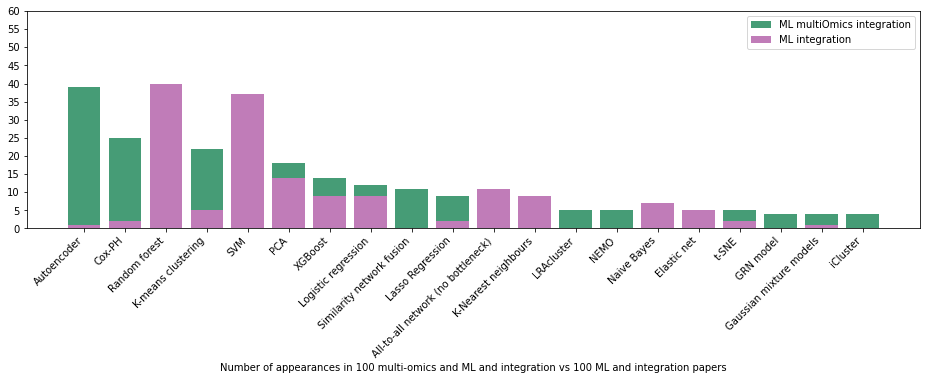

In [32]:
num_plotted = 35
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique[:20], merged_data_set.Count_x[:20], color = green, label='ML multiOmics integration', alpha=1)
axs.bar(merged_data_set.Technique[:20], merged_data_set.Count_y[:20], color = purple,  label='ML integration', alpha=1)
axs.set_xlabel("Number of appearances in 100 multi-omics and ML and integration vs 100 ML and integration papers")
axs.set_yticks(np.linspace(0,60,13))
plt.xticks(rotation=45, ha='right')
axs.legend()
plt.savefig("../../figures/Ml_general_vs_multiO.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Ml_general_vs_multiO.pdf", dpi=400, bbox_inches = "tight")

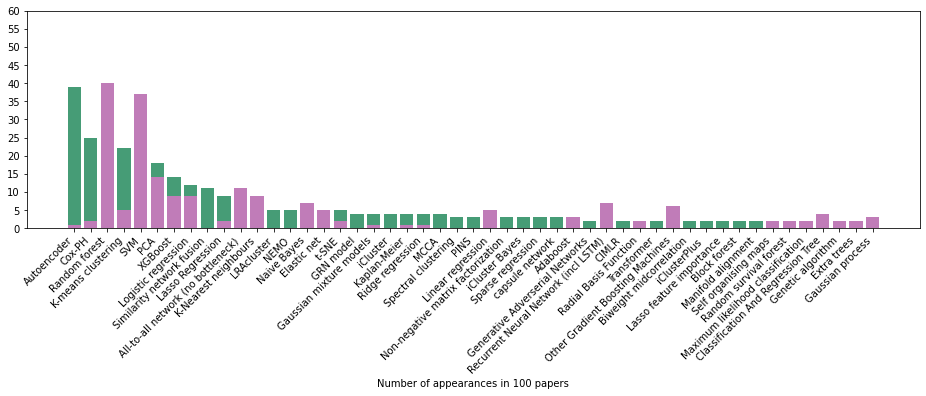

In [33]:
fig, axs = plt.subplots(1,1,figsize=(16,4), gridspec_kw={'height_ratios': [1]})
axs.bar(merged_data_set.Technique, merged_data_set.Count_x, color = green, label='ML multiOmics integration')
axs.bar(merged_data_set.Technique, merged_data_set.Count_y, color = purple,  label='ML integration')
axs.set_xlabel("Number of appearances in 100 papers")
axs.set_yticks(np.linspace(0,60,13))
plt.xticks(rotation=45, ha='right')
plt.savefig("../../figures/ml_general_vs_multiO_no_alpha.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/ml_general_vs_multiO_no_alpha.pdf", dpi=400, bbox_inches = "tight")